In [2]:
#!pip install pyshp
import shapefile

In [3]:
w = shapefile.Writer('shapefiles/test/polygon')
w.field('name', 'C')

w.poly([
[[113,24], [112,32], [117,36], [122,37], [118,20]], # poly 1
[[116,29],[116,26],[119,29],[119,32]], # hole 1
[[15,2], [17,6], [22,7]]  # poly 2
       ])
w.record('polygon1')
w.close()

In [5]:
polygon1

NameError: name 'polygon1' is not defined

### Polygon 1 

In [52]:
# Create a polygon shapefile
w = shapefile.Writer('shapefiles/test/polygon1')
w.field('name', 'C')
w.poly([[[0.00, -285.00],[39.76, -285.00],[39.76, -259.00],[0.00, -259.00]]])
w.record('polygon1')
w.close()

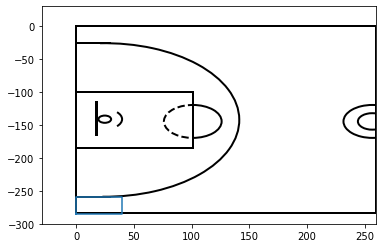

In [62]:
import matplotlib.pyplot as plt

sf = shapefile.Reader("polygon1.shp")

plt.figure(100)
draw_court(outer_lines=True)
plt.xlim(-30,260)
plt.ylim(-300,30)
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)


plt.show()

In [50]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((24.75, -141.25), radius=5.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((17.25, -115.25), 1, -50, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((0, -100.36), 100.97, -84.78, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((100.97, -144.63), 50, 50, angle = 270, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((100.97, -144.63), 50, 50, angle = 85, theta1= 0, theta2=180,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((24.75, -141.25), 30, 30, angle = 315, theta1=0, theta2=90, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((0, -26), 30, 0, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((0, -259), 30, 0, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((24.75, -142.40), 233, 233, angle = 225, theta1=44, theta2=227, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((256.5, -144.63), 50, 50, theta1=360, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((256.5, -144.63), 25, 25, theta1=360, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((0, 0), 260, -283, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax